# Explore here

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

total_data = pd.read_csv(url)

print(total_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
total_data.shape

(768, 9)

In [5]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
null_counts = total_data.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


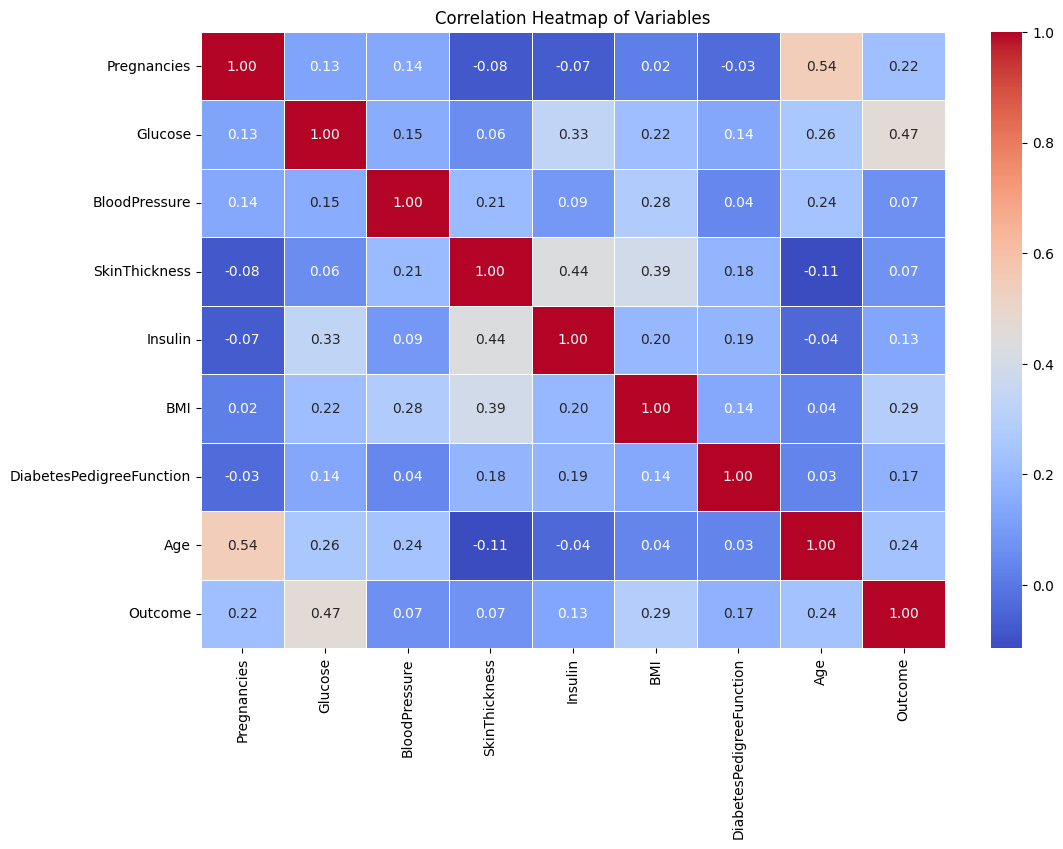

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [8]:
total_data.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)


In [9]:
total_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [10]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


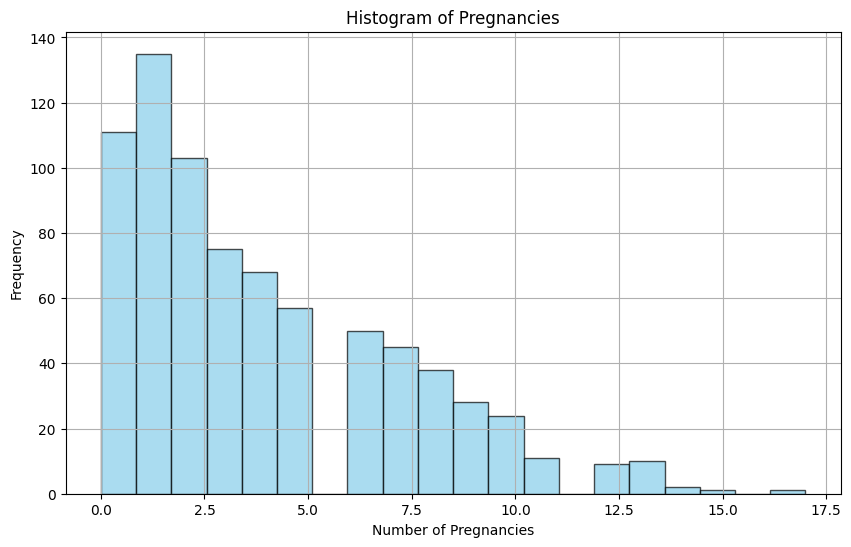

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(total_data['Pregnancies'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
def replace_outliers(val):
    if val > 10:
        return 10
    else:
        return val

# Replace outliers in the "Pregnancies" column
total_data['Pregnancies'] = total_data['Pregnancies'].apply(replace_outliers)

In [13]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.123898,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


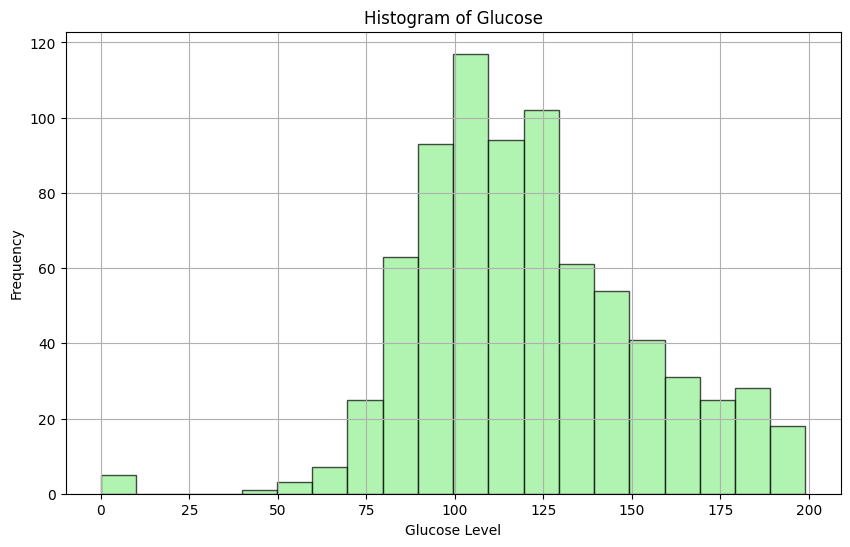

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['Glucose'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Define a function to replace values less than 50 with 50
def replace_values(val):
    if val < 50:
        return 50
    else:
        return val

# Replace values in the "Glucose" column
total_data['Glucose'] = total_data['Glucose'].apply(replace_values)

In [16]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.227865,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.123898,30.959138,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,50.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


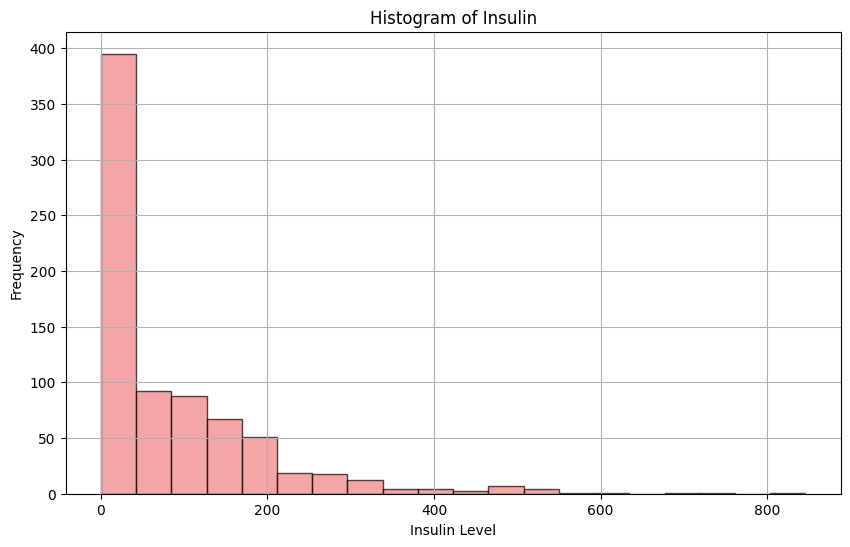

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['Insulin'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

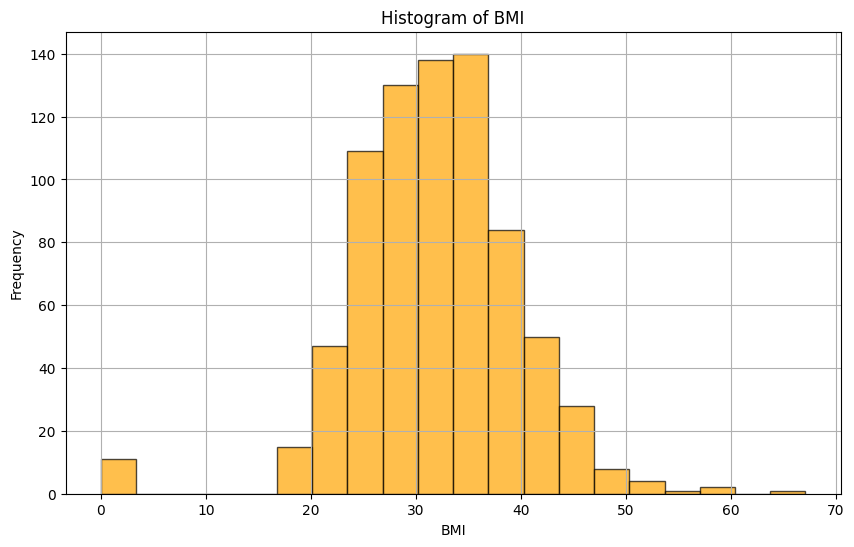

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['BMI'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
# Calculate the mean of non-zero values in the "BMI" column
mean_bmi = total_data.loc[total_data['BMI'] != 0, 'BMI'].mean()

# Replace zero values with the mean
total_data['BMI'] = total_data['BMI'].replace(0, mean_bmi)

In [20]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.227865,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.123898,30.959138,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,50.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Accuracy: 0.696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231


Confusion Matrix:
[[121  30]
 [ 40  40]]


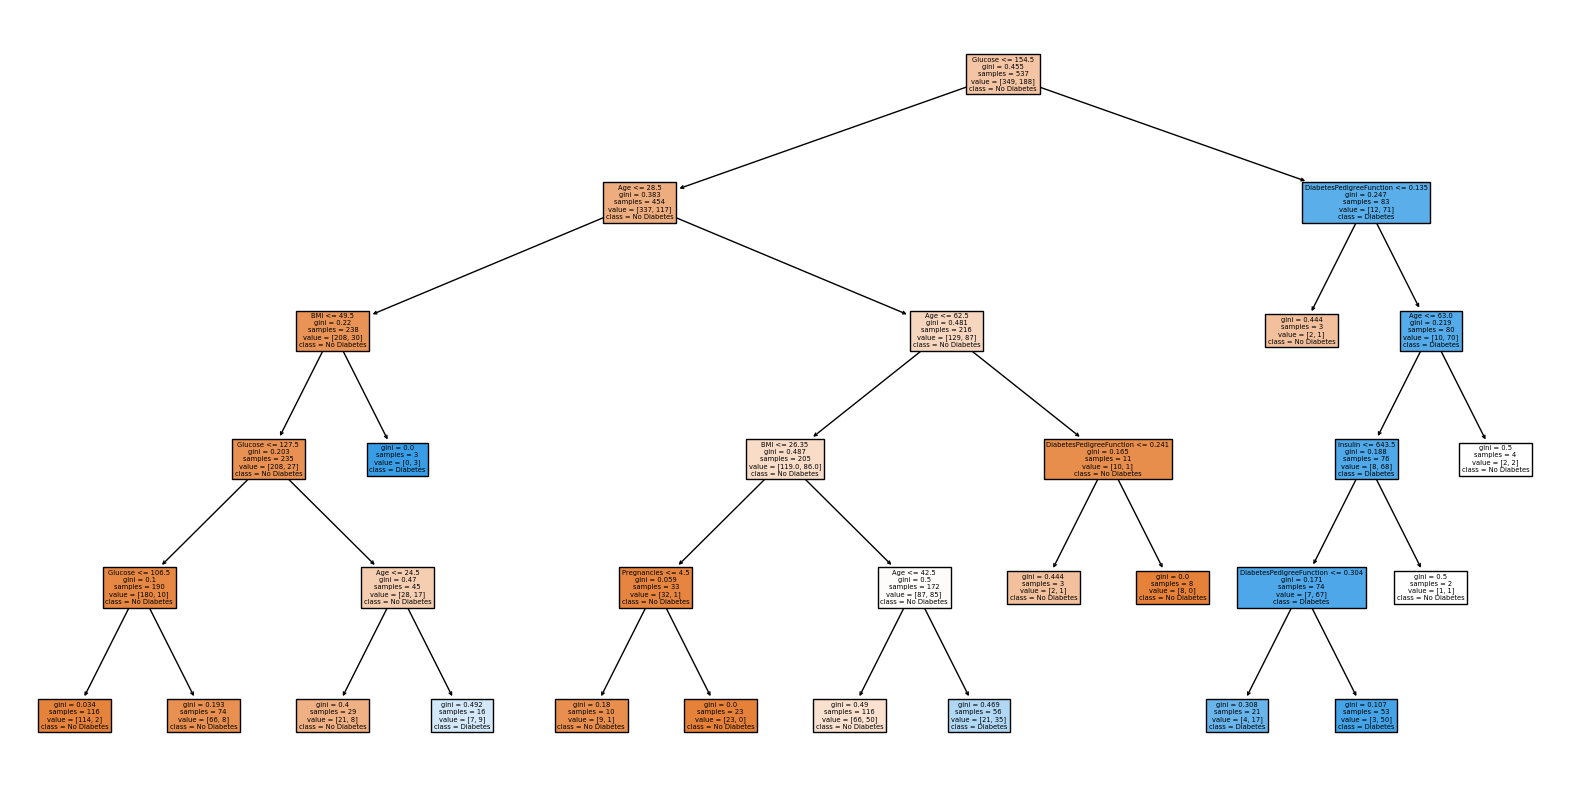

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Drop the outcome column to separate features and target variable
X = total_data.drop('Outcome', axis=1)  # Features (independent variables)
y = total_data['Outcome']  # Target variable (dependent variable)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='gini')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

In [22]:
# Analyze feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                    Feature  Importance
1                   Glucose    0.563504
5                       Age    0.243547
3                       BMI    0.159278
4  DiabetesPedigreeFunction    0.026173
2                   Insulin    0.006158
0               Pregnancies    0.001341


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# First set of hyperparameters
n_estimators_1 = 100
learning_rate_1 = 0.5

# Create an AdaBoost classifier with the first set of hyperparameters
clf_1 = AdaBoostClassifier(
    n_estimators=n_estimators_1,
    learning_rate=learning_rate_1,
    random_state=42)

# Train the classifier on the training data
clf_1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_1 = clf_1.predict(X_test)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy with hyperparameters (n_estimators={}, learning_rate={}): {:.4f}".format(n_estimators_1, learning_rate_1, accuracy_1))

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))

# Second set of hyperparameters
n_estimators_2 = 150
learning_rate_2 = 1.0

# Create an AdaBoost classifier with the second set of hyperparameters
clf_2 = AdaBoostClassifier(
    n_estimators=n_estimators_2,
    learning_rate=learning_rate_2,
    random_state=42)

# Train the classifier on the training data
clf_2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_2 = clf_2.predict(X_test)

# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("\nAccuracy with hyperparameters (n_estimators={}, learning_rate={}): {:.4f}".format(n_estimators_2, learning_rate_2, accuracy_2))

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))


/home/vscode/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy with hyperparameters (n_estimators=100, learning_rate=0.5): 0.7359

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
[[120  31]
 [ 30  50]]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Accuracy with hyperparameters (n_estimators=150, learning_rate=1.0): 0.7403

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
[[121  30]
 [ 30  50]]


In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create an AdaBoost classifier
clf = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model:", accuracy)

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy of Best Model: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.68      0.55      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
[[130  21]
 [ 36  44]]


In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score
from scipy.stats import uniform, randint

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 2.0)
}

# Create an AdaBoost classifier with algorithm='SAMME'
clf = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# Define scoring metrics (precision and recall)
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Instantiate the RandomizedSearchCV object with precision and recall as scoring metrics
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50,
                                   cv=5, scoring=scoring, refit='precision', random_state=42)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision of Best Model:", precision)
print("Recall of Best Model:", recall)




Best Hyperparameters: {'learning_rate': 0.051168988591604896, 'n_estimators': 51}
Precision of Best Model: 0.671875
Recall of Best Model: 0.5375


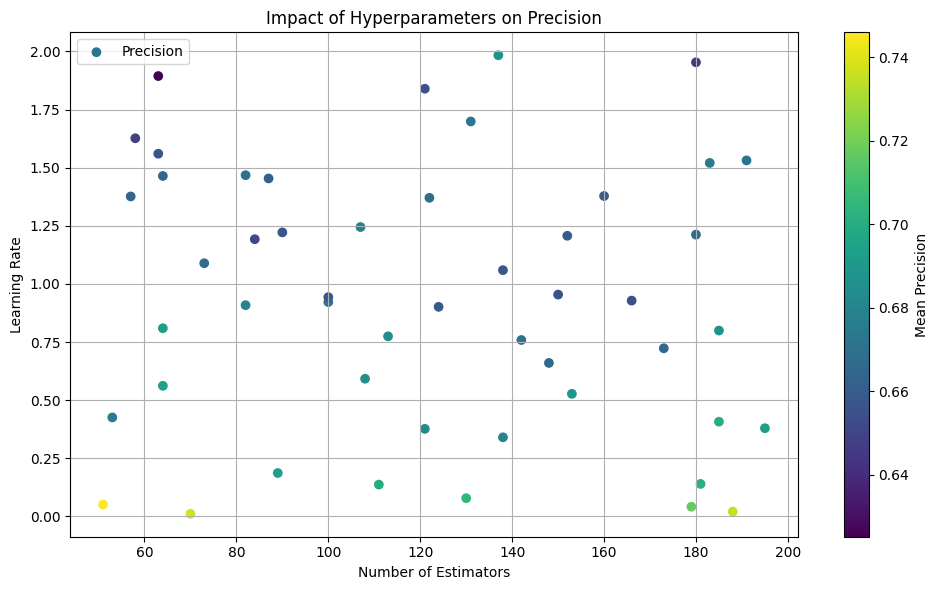

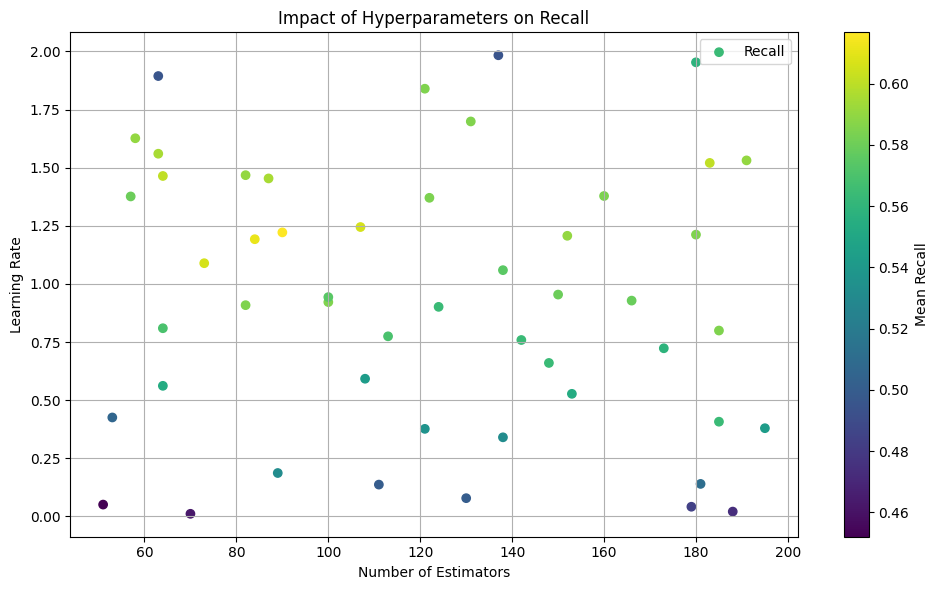

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get the results from RandomizedSearchCV
results = random_search.cv_results_

# Extract the hyperparameters and corresponding mean test scores
params = results['params']
mean_test_precision = results['mean_test_precision']
mean_test_recall = results['mean_test_recall']

# Extract the values of the hyperparameters for plotting
n_estimators = [param['n_estimators'] for param in params]
learning_rate = [param['learning_rate'] for param in params]

# Plotting precision
plt.figure(figsize=(10, 6))
plt.scatter(n_estimators, learning_rate, c=mean_test_precision, cmap='viridis', label='Precision', marker='o')
plt.colorbar(label='Mean Precision')
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Impact of Hyperparameters on Precision')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting recall
plt.figure(figsize=(10, 6))
plt.scatter(n_estimators, learning_rate, c=mean_test_recall, cmap='viridis', label='Recall', marker='o')
plt.colorbar(label='Mean Recall')
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Impact of Hyperparameters on Recall')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
